Customization of the Graph

In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import ast
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_DA = df[df['job_title_short']=='Data Analyst'].copy()

<function matplotlib.pyplot.show(close=None, block=None)>

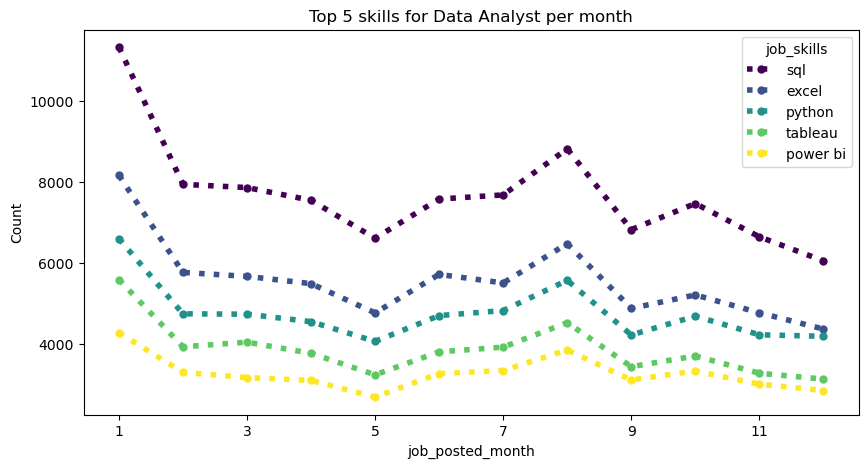

In [3]:
df_DA['job_posted_month_no']=df_DA['job_posted_date'].dt.month
df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot=df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',aggfunc='size',fill_value=0)
##Fill Value changes NaN value since for ploting Nan vaules are not good
df_DA_pivot.loc['Total']=df_DA_pivot.sum()
##This above code creates a new row total and sums all
df_DA_pivot.loc['Total'].sort_values(ascending=False).index
##index is used to get job_skills since they are column titles
df_DA_pivot=df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
##This above code is to sort the pivot dataFrame
df_DA_pivot=df_DA_pivot.drop('Total')
## The commented line below are to change the x-axis months number to wording
# df_DA_pivot=df_DA_pivot.reset_index()
# df_DA_pivot['job_posted_month']=df_DA_pivot['job_posted_month_no'].apply(lambda x:pd.to_datetime(x,format='%m').strftime('%b'))
# df_DA_pivot=df_DA_pivot.set_index('job_posted_month')
# df_DA_pivot=df_DA_pivot.drop(columns='job_posted_month_no')
df_DA_pivot.iloc[:,:5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', #options '-','--','-.'
    colormap='viridis' ,#or diff colour
    marker='o', #options:'o','x','+','s',',','.','1','2'...
    markersize=5,
    figsize=(10,5)
    
    
)
plt.title('Top 5 skills for Data Analyst per month')
plt.ylabel('Count')
plt.xlabel('job_posted_month')
plt.show


CUSTOMIZING THE SCATTER PLOT

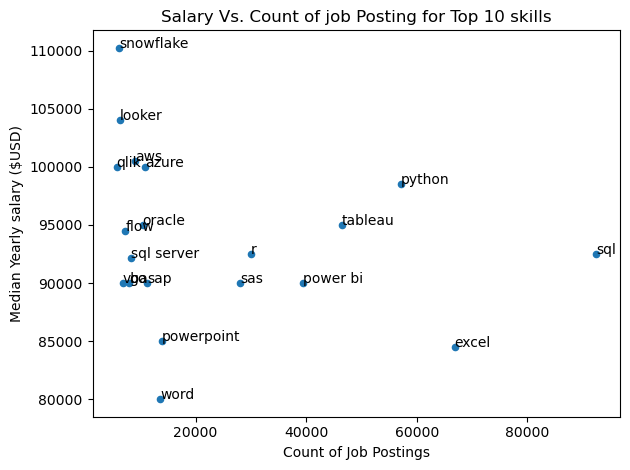

In [ ]:
df=df[df['job_title_short']=='Data Analyst']
df_exploded=df.explode('job_skills')
skill_stats=df_exploded.groupby('job_skills').agg(
 skill_count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
)
skill_count=20
skill_stats=skill_stats.sort_values(by='skill_count',ascending=False).head(skill_count)
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.title('Salary Vs. Count of job Posting for Top 10 skills')
plt.ylabel('Median Yearly salary ($USD)')
plt.xlabel('Count of Job Postings')
plt.tight_layout()
## The below code is to get text on points 
for i, txt in enumerate(skill_stats.index):
    # print(i,txt)
 plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i],txt)
plt.show()



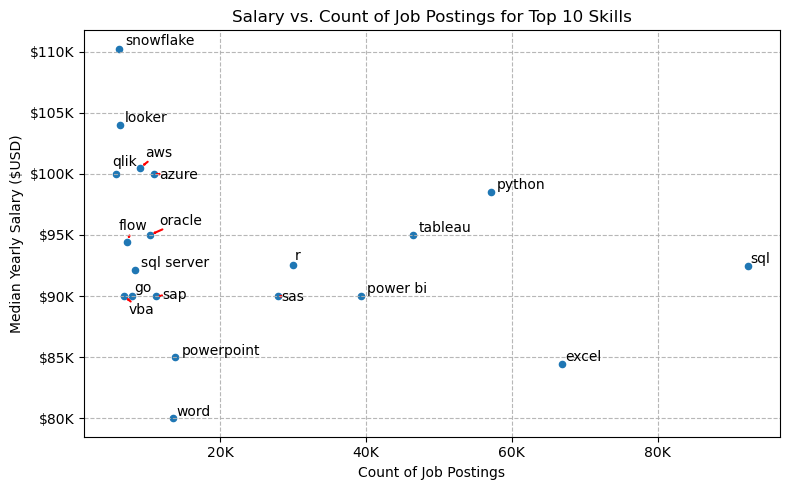

In [ ]:

from adjustText import adjust_text

# Assuming 'skill_stats' is a DataFrame with columns 'skill_count', 'median_salary', and index containing skill names.
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary', figsize=(8, 5))

# Add text labels to each point
texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=1.5))
# fig, ax=plt.subplots()
## Or
ax=plt.gca()
## Formatting the y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f'${int(y/1000)}K'))
## Formatting x-axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'{int(x/1000)}K'))

# Add labels, title, and formatting
plt.ylabel('Median Yearly Salary ($USD)')
plt.xlabel('Count of Job Postings')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.grid(True, linestyle='--', alpha=0.9)
plt.tight_layout()

# Show plot
plt.show()
